In [54]:
%matplotlib inline

In [ ]:
#http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.SimilarityTransform

<div class="document" id="using-geometric-transformations">
<h1 class="title">Using geometric transformations</h1>
<p>In this example, we will see how to use geometric transformations in the context
of image processing.</p>
</div>


In [55]:

from __future__ import print_function

import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform as tf





<div class="document" id="basics">
<h1 class="title">Basics</h1>
<p>Several different geometric transformation types are supported: similarity,
affine, projective and polynomial.</p>
<p>Geometric transformations can either be created using the explicit parameters
(e.g. scale, shear, rotation and translation) or the transformation matrix:</p>
<p>First we create a transformation using explicit parameters:</p>
</div>


In [56]:

tform = tf.SimilarityTransform(scale=1, rotation=math.pi / 2,
                               translation=(0, 1))
print(tform.params)
print (tform.params[1,0])


[[  6.12323400e-17  -1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   6.12323400e-17   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
1.0


<div class="document">
<p>Alternatively you can define a transformation by the transformation matrix
itself:</p>
</div>


In [57]:

matrix = tform.params.copy()
matrix[1, 2] = 2
tform2 = tf.SimilarityTransform(matrix)



<div class="document">
<p>These transformation objects can then be used to apply forward and inverse
coordinate transformations between the source and destination coordinate
systems:</p>
</div>


In [58]:
print(tform2.params)
print 
coord = [1, 0]
print(tform2(coord))
print(tform2.inverse(tform2(coord)))



[[  6.12323400e-17  -1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   6.12323400e-17   2.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
[[  6.12323400e-17   3.00000000e+00]]
[[  1.00000000e+00  -2.46519033e-32]]


<div class="document" id="image-warping">
<h1 class="title">Image warping</h1>
<p>Geometric transformations can also be used to warp images:</p>
</div>


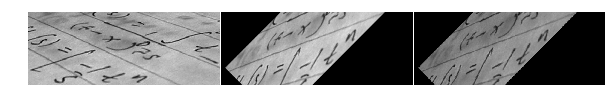

In [59]:

text = data.text()

tform = tf.SimilarityTransform(scale=1, rotation=math.pi / 4,
                               translation=(text.shape[0] / 2, -100))

rotated = tf.warp(text, tform)
back_rotated = tf.warp(rotated, tform.inverse)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))
margins = dict(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
fig.subplots_adjust(**margins)
plt.gray()
ax1.imshow(text)
ax1.axis('off')
ax2.imshow(rotated)
ax2.axis('off')
ax3.imshow(back_rotated)
ax3.axis('off')



<div class="document" id="parameter-estimation">
<h1 class="title">Parameter estimation</h1>
<p>In addition to the basic functionality mentioned above you can also estimate the
parameters of a geometric transformation using the least-squares method.</p>
<p>This can amongst other things be used for image registration or rectification,
where you have a set of control points or homologous/corresponding points in two
images.</p>
<p>Let's assume we want to recognize letters on a photograph which was not taken
from the front but at a certain angle. In the simplest case of a plane paper
surface the letters are projectively distorted. Simple matching algorithms would
not be able to match such symbols. One solution to this problem would be to warp
the image so that the distortion is removed and then apply a matching algorithm:</p>
</div>


(-0.5, 299.5, 49.5, -0.5)

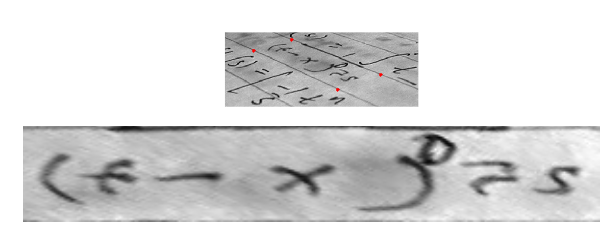

In [60]:

text = data.text()

src = np.array((
    (0, 0),
    (0, 50),
    (300, 50),
    (300, 0)
))
dst = np.array((
    (155, 15),
    (65, 40),
    (260, 130),
    (360, 95)
))

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 3))
fig.subplots_adjust(**margins)
plt.gray()
ax1.imshow(text)
ax1.plot(dst[:, 0], dst[:, 1], '.r')
ax1.axis('off')
ax2.imshow(warped)
ax2.axis('off')



<div class="document">
</div>


In [61]:

plt.show()
